### **CC57 - MACHINE LEARNING - CLASIFICADOR SUPPORT VECTOR MACHINE - SVM**

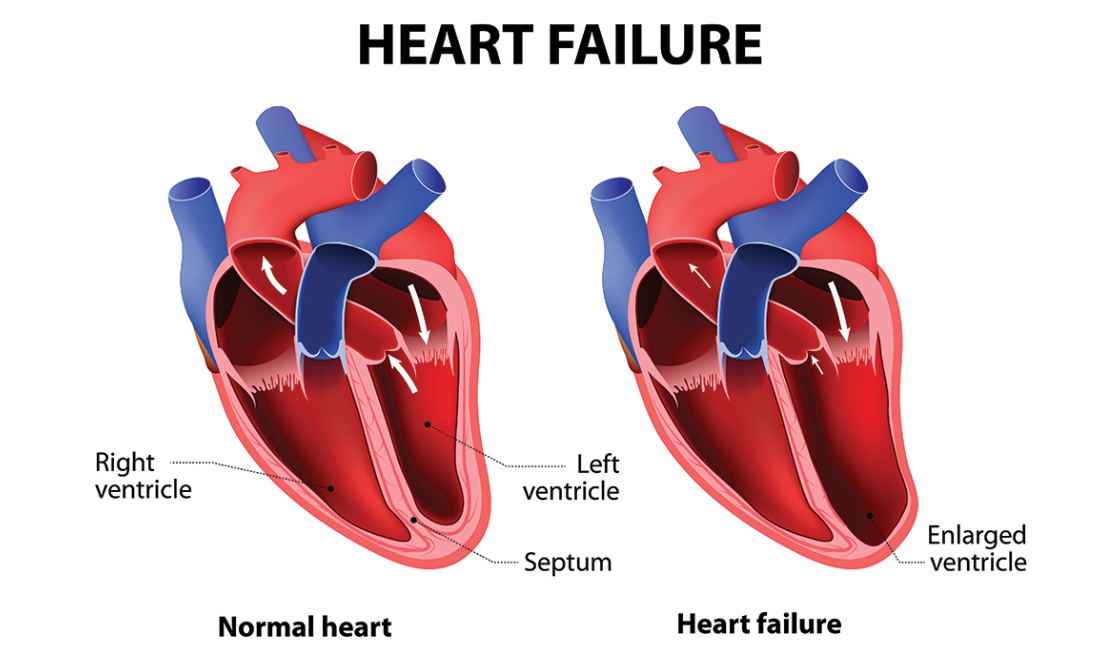

## **Funcion de perdida (Loss Function)**

La función de pérdida en la ecuación. 1 se puede dividir en dos partes de la siguiente manera:

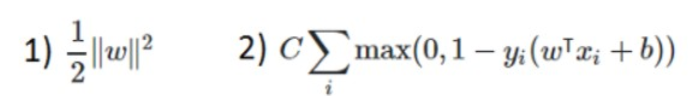

El primer término intenta minimizar los parámetros w y obtener un margen alto. El segundo término se refiere a la pérdida de bisagra. Calcula la variable de holgura para cada conjunto de datos. Si algún conjunto de datos se encuentra entre el margen o el lado equivocado, se penalizará la pérdida de la bisagra.

La reducción del primer término hace que la ampliación del margen disminuya y se amplíe. Minimizar el segundo término da como resultado un acortamiento del margen para reducir la pérdida de bisagra. Con base en el valor de C, finalmente establecemos un margen fijo. El valor de C determina un margen suave/duro en la curva.

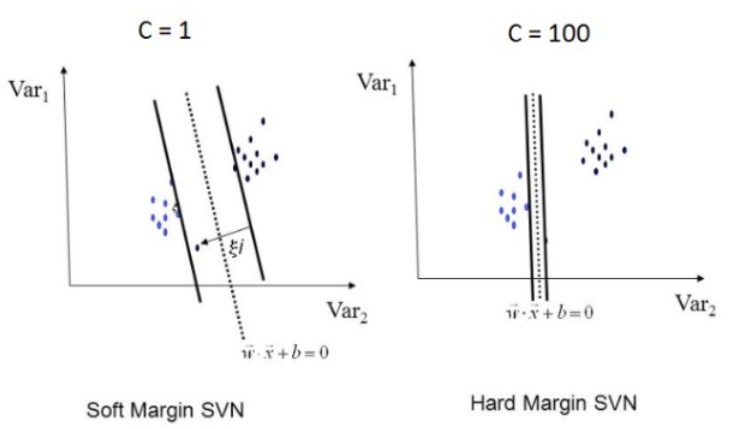

En el diagrama anterior, tiene claros los efectos de C en la obtención del margen.
Nosotros podemos usar: Núcleo gaussiano, núcleo polinómico, núcleo sigmoide, núcleo Laplace RBF, etc. en núcleos no lineales.

## Hiperparametros
- **Constante de margen suave (C):**
    - Es un hiperparámetro que decide el nivel de penalización de los valores atípicos. Es lo inverso del parámetro de regularización. Cuando C es grande, los valores atípicos recibirán una penalización alta y se creará un margen rígido. Cuando C es pequeño, los valores atípicos se desprecian y el margen es grande.
- **El grado del polinomio en el núcleo polinomial (d):**
   - Cuando d = 1, equivale a un núcleo lineal. Cuando D es mayor, el núcleo es lo suficientemente flexible como para distinguir patrones complejos proyectándolos en un nuevo hiperplano.

- **Parámetro de ancho (γ) en el núcleo gaussiano:**
    - Gamma decide el ancho de la curva gaussiana. El ancho aumenta con el aumento de gamma.

In [1]:
# Import the necessary packages

import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import and read dataset

input_ = "heart_dataset.csv"
data = pd.read_csv(input_)
df = data.copy()

data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [3]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [4]:
inp_data = data.drop(data[['DEATH_EVENT']], axis=1)
out_data = data[['DEATH_EVENT']]

scaler = StandardScaler()
inp_data = scaler.fit_transform(inp_data)

X_train, X_test, y_train, y_test = train_test_split(inp_data, out_data, test_size=0.2, random_state=42)

In [5]:
print("X_train Shape : ", X_train.shape)
print("X_test Shape  : ", X_test.shape)
print("y_train Shape : ", y_train.shape)
print("y_test Shape  : ", y_test.shape)

X_train Shape :  (239, 12)
X_test Shape  :  (60, 12)
y_train Shape :  (239, 1)
y_test Shape  :  (60, 1)


In [6]:
# Metodo basico
clf = SVC()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('SVC f1-score  : {:.4f}'.format(f1_score(y_pred, y_test)))
print('SVC precision : {:.4f}'.format(precision_score(y_pred, y_test)))
print('SVC recall    : {:.4f}'.format(recall_score(y_pred, y_test)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.7500
SVC f1-score  : 0.6154
SVC precision : 0.4800
SVC recall    : 0.8571

               precision    recall  f1-score   support

           0       0.94      0.72      0.81        46
           1       0.48      0.86      0.62        14

    accuracy                           0.75        60
   macro avg       0.71      0.79      0.72        60
weighted avg       0.83      0.75      0.77        60



In [7]:
# Encontrar los mejores parámetros con SVC | Paso 1
kernels = list(['linear', 'rbf', 'poly', 'sigmoid'])
c = list([0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000])
gammas = list([0.1, 1, 10, 100])

clf = SVC()
clf.fit(X_train, y_train)

#gridsearch en Python es un método de búsqueda que toma en cuenta diferentes combinaciones de hiperparámetros
#y elige la combinación que arroja un margen de error más bajo
param_grid = dict(kernel=kernels, C=c, gamma=gammas)
grid = GridSearchCV(clf, param_grid, cv=10, n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'linear'}

In [8]:
#Ejecutamos el clasificador SVC con los mejores hioerparametros
clf = SVC(C=10, gamma=0.1, kernel='linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('SVC f1-score  : {:.4f}'.format(f1_score(y_pred, y_test)))
print('SVC precision : {:.4f}'.format(precision_score(y_pred, y_test)))
print('SVC recall    : {:.4f}'.format(recall_score(y_pred, y_test)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.8000
SVC f1-score  : 0.7143
SVC precision : 0.6000
SVC recall    : 0.8824

               precision    recall  f1-score   support

           0       0.94      0.77      0.85        43
           1       0.60      0.88      0.71        17

    accuracy                           0.80        60
   macro avg       0.77      0.82      0.78        60
weighted avg       0.85      0.80      0.81        60



In [9]:
# Encontrar los mejores parámetros con SVC | Paso 2
# MAntenemos el tipo de kernel linear pero probamos obtener mejores hiperparamentros para c y gammas
kernels = list(['linear'])
c = list([5,10,15,20,25,30])
gammas = list([0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

clf = SVC()
clf.fit(X_train, y_train)

#NO OLVIDAR:
#gridsearch en Python es un método de búsqueda que toma en cuenta diferentes combinaciones de hiperparámetros
#y elige la combinación que arroja un margen de error más bajo

param_grid = dict(kernel=kernels, C=c, gamma=gammas)
grid = GridSearchCV(clf, param_grid, cv=10, n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_params_

{'C': 5, 'gamma': 0.05, 'kernel': 'linear'}

In [10]:
#Ejecutamos el clasificador SVC con los mejores hioerparametros (obtenidos en el paso 2)
#Observamos que mejoramos la precision del modelo con estos hiperparametros

clf = SVC(C=5, gamma=0.05, kernel='linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('SVC f1-score  : {:.4f}'.format(f1_score(y_pred, y_test)))
print('SVC precision : {:.4f}'.format(precision_score(y_pred, y_test)))
print('SVC recall    : {:.4f}'.format(recall_score(y_pred, y_test)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.8167
SVC f1-score  : 0.7317
SVC precision : 0.6000
SVC recall    : 0.9375

               precision    recall  f1-score   support

           0       0.97      0.77      0.86        44
           1       0.60      0.94      0.73        16

    accuracy                           0.82        60
   macro avg       0.79      0.86      0.80        60
weighted avg       0.87      0.82      0.83        60



## **Después del proceso SMOTE**

Cuando se tiene un **conjunto de datos desequilibrado**, se puede conectar el modelo con el **módulo SMOTE**.

Puede haber numerosas razones para que un conjunto de datos este desequilibrado. Tal vez la categoría objetivo tiene un conjunto de datos único en la población, o los datos son difíciles de recoger.

Puede utilizar la ayuda de SMOTE para analizar la clase subrepresentada. La salida de este módulo contendrá la muestra original así como muestras adicionales. Estas nuevas muestras son **muestras sintéticas de minorías**. Se debe definir el número de estas muestras sintéticas antes de iniciar la técnica.

Mas informacion: https://datascience.eu/es/programacion/smote/



In [11]:
#Uso del modulo SMOTE

from imblearn.over_sampling import SMOTE

'''
# inp_data ya esta escalada por el StandardScaler
# Y este es el shape original
X_train Shape :  (239, 12)
X_test Shape  :  (60, 12)
y_train Shape :  (239, 1)
y_test Shape  :  (60, 1)
'''

# Aplicamos el SMOTE y configuramos la data de entrenamiento y test con la nueva data que contiene las muestas u observaciones sinteticas
sms = SMOTE(random_state=12345)
X_res, y_res = sms.fit_resample(inp_data, out_data)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

print("X_train Shape : ", X_train.shape)
print("X_test Shape  : ", X_test.shape)
print("y_train Shape : ", y_train.shape)
print("y_test Shape  : ", y_test.shape)

X_train Shape :  (324, 12)
X_test Shape  :  (82, 12)
y_train Shape :  (324, 1)
y_test Shape  :  (82, 1)


In [12]:
# Encontrar los mejores parámetros con SVC | Paso 2
# Pero ahora entrenamos el clasificador SVC con el dataset que contiene las muestras sinteticas
kernels = list(['linear', 'rbf', 'poly', 'sigmoid'])
c = list([20,25,30,35,40,45,50])
gammas = list([0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

#NO OLVIDAR:
#gridsearch en Python es un método de búsqueda que toma en cuenta diferentes combinaciones de hiperparámetros
#y elige la combinación que arroja un margen de error más bajo
clf = SVC()
param_grid = dict(kernel=kernels, C=c, gamma=gammas)
grid = GridSearchCV(clf, param_grid, cv=10, n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_params_

{'C': 30, 'gamma': 0.08, 'kernel': 'rbf'}

In [13]:
#Aplicamos para el entrenamiento los mejores hiperparamentros obtenidos
#Observamos que obtenemos una mejor precision del modelo comparado a entrenarlo sin las muestras sinteticas

clf = SVC(C=30, gamma=0.08, kernel='rbf')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('SVC f1-score  : {:.4f}'.format(f1_score(y_pred, y_test)))
print('SVC precision : {:.4f}'.format(precision_score(y_pred, y_test)))
print('SVC recall    : {:.4f}'.format(recall_score(y_pred, y_test)))
print("\n",classification_report(y_pred, y_test))

Accuracy Score: 0.8780
SVC f1-score  : 0.8780
SVC precision : 0.8780
SVC recall    : 0.8780

               precision    recall  f1-score   support

           0       0.88      0.88      0.88        41
           1       0.88      0.88      0.88        41

    accuracy                           0.88        82
   macro avg       0.88      0.88      0.88        82
weighted avg       0.88      0.88      0.88        82



In [17]:
y_pred = clf.predict(X_test)

cf_matrix = confusion_matrix(y_pred, y_test)
cf_matrix


array([[42,  3],
       [ 9, 28]])

Text(0.5, 23.52222222222222, 'Predicted label')

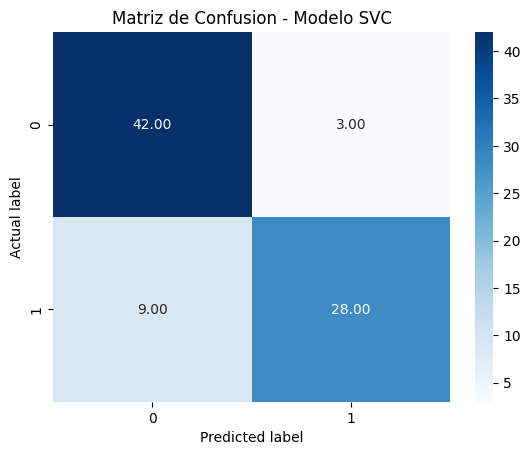

In [25]:
#Matriz de Confusion en Valores (predichos a partir del dataset de prueba)
sns.heatmap(cf_matrix, annot = True, fmt=".2f", cmap="Blues")
plt.title('Matriz de Confusion - Modelo SVC')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 23.52222222222222, 'Predicted label')

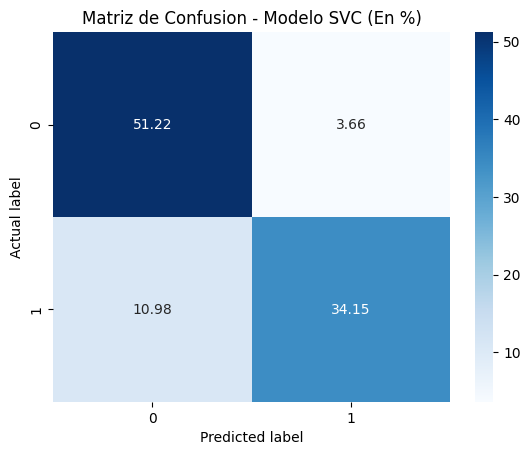

In [26]:
#Matriz de Confusion en %
sns.heatmap((cf_matrix / np.sum(cf_matrix)*100), annot = True, fmt=".2f", cmap="Blues")
plt.title('Matriz de Confusion - Modelo SVC (En %)')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## **Informes**

Evaluando los resultados encontrados con la Matriz de Confusion (en %), los resultados son los siguientes:

**Predicho correctamente -> 85.37% (70 de 82 predichos son correctos)**
- Verdadero Negativo (a) -> 51.22% -> Aquellos que se predijo que no morirían y que no murieron
- Verdadero Positivo (d) -> 34.15%-> Aquellos que se predijo que morirían y quienes sí murieron

**Prediciones incorrectas-> 14,64% (12 de 82 predicciones son incorrectas)**
- Falso Positivo (b) -> 03.66% -> Aquellos que se predijo que morirían pero que no murieron
- Falso Negativo (c) -> 10.98% -> Aquellos que se predijo que no morirían pero que sí murieron

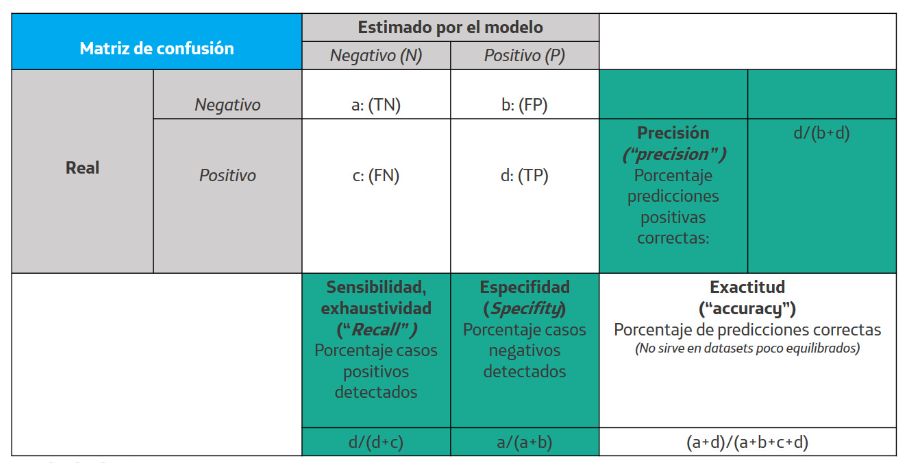

#### **Prueba de Cordura**

Una **prueba de cordura** (del inglés sanity check) es una prueba básica para evaluar rápidamente si una aseveración, o el resultado de un cálculo, es siquiera posible.

Como prueba de cordura, hagamos 500 rondas de muestreo aleatorio y evaluemos la estabilidad de nuestro modelo:

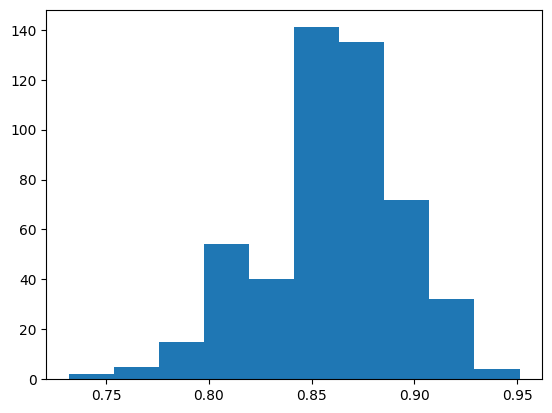

In [15]:
scores = []
for i in range(0,500):
    X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2)
    clf = SVC(kernel='rbf', C=30, gamma=0.08)
    clf.fit(X_train, y_train)
    scores.append(accuracy_score(clf.predict(X_test), y_test))

plt.hist(scores)
plt.show()

Se observa que la distribucion de los scores de precision obtenidos luego del el entrenamiento guardan una distribucion normal.